In [214]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,mean_squared_error
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE,ADASYN

# KNN Classifier

In [215]:
df=pd.read_csv("Bank.csv")
df_boston=pd.read_csv("Boston.csv")

In [216]:
df.head()

,age,duration,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,210,1.4,93.444,-36.1,4.963,5228.1,0
1,53,138,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,339,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,185,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,137,-2.9,92.201,-31.4,0.869,5076.2,1


In [217]:
X=df.drop("y",axis=1)
y=df["y"]

In [218]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [219]:
KNNClassifier=KNeighborsClassifier(n_neighbors=10)

In [220]:
KNNClassifier.fit(X,y)

KNeighborsClassifier(n_neighbors=10)

In [221]:
y_pred=KNNClassifier.predict(X_test)

In [222]:
accuracy_score(y_test,y_pred)

0.9195193008011653

In [223]:
confusion_matrix(y_test,y_pred)

array([[7151,  174],
       [ 489,  424]], dtype=int64)

In [224]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      7325
           1       0.71      0.46      0.56       913

    accuracy                           0.92      8238
   macro avg       0.82      0.72      0.76      8238
weighted avg       0.91      0.92      0.91      8238



In [225]:
print("X :",X.shape,", y :",y.shape)

X : (41188, 7) , y : (41188,)


# ADASYN

In [226]:
ada=ADASYN()

In [227]:
X_ada,y_ada=ada.fit_resample(X,y)

In [228]:
print("X_ada :",X_ada.shape,", y_ada :",y_ada.shape)

X_ada : (73893, 7) , y_ada : (73893,)


# KNN Regressor

In [229]:
df_boston.head()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [230]:
X=df_boston.drop("medv",axis=1)
y=df_boston["medv"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
KNNRegressor=KNeighborsRegressor(n_neighbors=10)
KNNRegressor.fit(X_train,y_train)
y_pred=KNNRegressor.predict(X_test)
mean_squared_error(y_test,y_pred)

55.82588137254903

In [231]:
print("root mean squard error",np.sqrt(mean_squared_error(y_test,y_pred)))

root mean squard error 7.471671926185532


# How to find the optimal K?

In [232]:
X=df_boston.drop("medv",axis=1)
y=df_boston["medv"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
#get train set
Xtr,Xts,ytr,yts=train_test_split(X_train,y_train,test_size=0.2,random_state=0)

In [233]:
K=[k for k in range (1,20)]

In [234]:
K

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [235]:
errors=[]

In [236]:
for k in K:
    model=KNeighborsRegressor(n_neighbors=k)
    model.fit(Xtr,ytr)
    ypr=model.predict(Xts)
    mse=mean_squared_error(yts,ypr)
    errors.append(mse)

In [247]:
np.sqrt(errors)

array([6.36788819, 4.88638509, 5.26565469, 5.2596817 , 5.55496352,
       6.02940668, 6.09163377, 6.2120142 , 6.32896415, 6.44372122,
       6.59146505, 6.65718738, 6.87957441, 6.93285414, 6.97873442,
       6.98144069, 7.00755014, 7.06701663, 7.1449819 ])

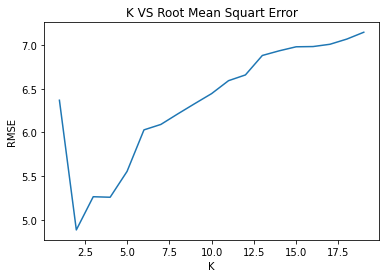

In [249]:
plt.plot(K, np.sqrt(errors))
plt.xlabel("K")
plt.ylabel("RMSE")
plt.title("K VS Root Mean Squart Error")
plt.show()
